# 10. Introduction to Artificial Neural Networks with Keras

## Simple Example

In [1]:
# Importing the packages
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

import numpy as np

In [3]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

import graphviz
import pydot
import pydotplus

In [2]:
tf.__version__

'2.14.0'

In [4]:
# Loading data
data = np.random.random((1000, 10))
Y = np.random.randint(2, size=(1000, 1))

In [5]:
# Creating the model using the Sequential API
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=data.shape[1:]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


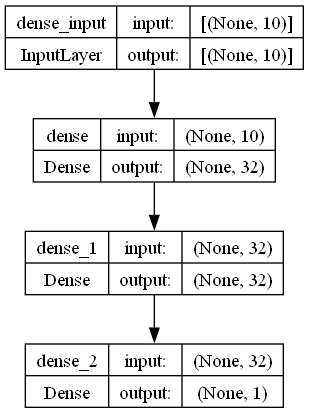

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Fitting the model
model.fit(data, Y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 3s 5ms/step - loss: 0.6952 - accuracy: 0.5150
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5210
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5320
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5330
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5330
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5310
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5370
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5470
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5460
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5480


In [20]:
# Evaluating the model
scores = model.evaluate(X_test, Y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

NameError: name 'X_test' is not defined

## Building an Image Classifier Using the Sequential API

### Importing the packages

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
tf.__version__

'2.14.0'

### Loading data

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [24]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [25]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [26]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

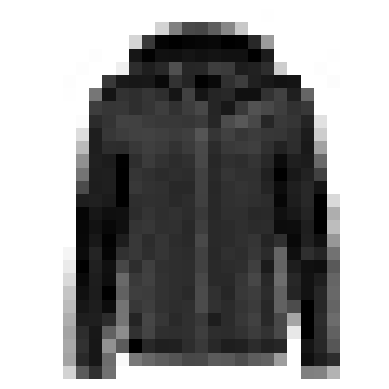

In [27]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [28]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [29]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [30]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [31]:
X_valid.shape

(5000, 28, 28)

In [32]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

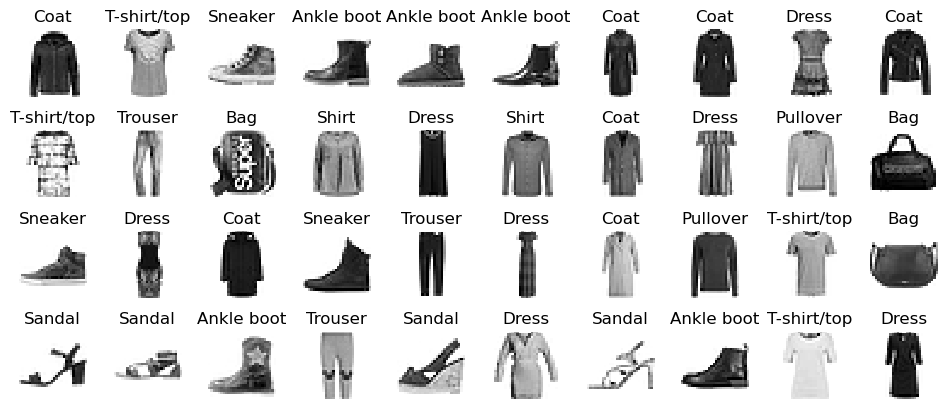

In [33]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the model using the Sequential API

In [34]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compiling the model

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Fitting the model

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7167 - accuracy: 0.7662 - val_loss: 0.4932 - val_accuracy: 0.8390
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4845 - accuracy: 0.8317 - val_loss: 0.4548 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4393 - accuracy: 0.8473 - val_loss: 0.4317 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4118 - accuracy: 0.8559 - val_loss: 0.3930 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3922 - accuracy: 0.8635 - val_loss: 0.3983 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3754 - accuracy: 0.8680 - val_loss: 0.3743 - val_accuracy: 0.8658
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3630 - accuracy: 0.8721 - val_loss: 0.3601 - val_ac

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

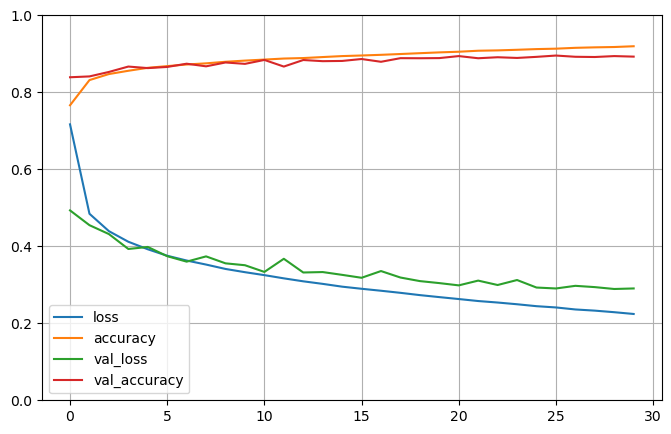

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluating the model

In [42]:
scores = model.evaluate(X_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.3241 - accuracy: 0.8841
accuracy: 88.41%


### Using the model to make predictions

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 302ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [44]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 72ms/step


array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

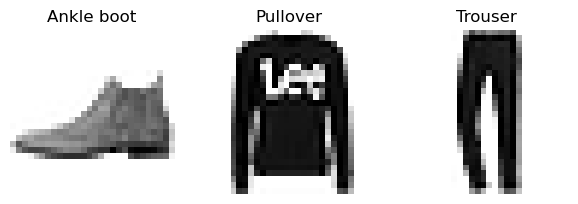

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP Using the Sequential API

### Importing the packages

In [48]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd

In [49]:
tf.__version__

'2.14.0'

### Loading data

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Creating the model using the Sequential API

In [51]:
model = Sequential()
model.add(Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(Dense(1))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Compiling the model

In [54]:
model.compile(loss="mean_squared_error", optimizer="sgd")

### Fitting the model

In [55]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.7659 - val_loss: 2.6075
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4414 - val_loss: 0.3917
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4300 - val_loss: 0.3889
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3916 - val_loss: 0.3752
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3862 - val_loss: 0.3540
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3815 - val_loss: 0.3552
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3744 - val_loss: 0.3637
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3733 - val_loss: 0.3502
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3656 - val_loss: 0.3620
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3653 - val_loss: 0.3587

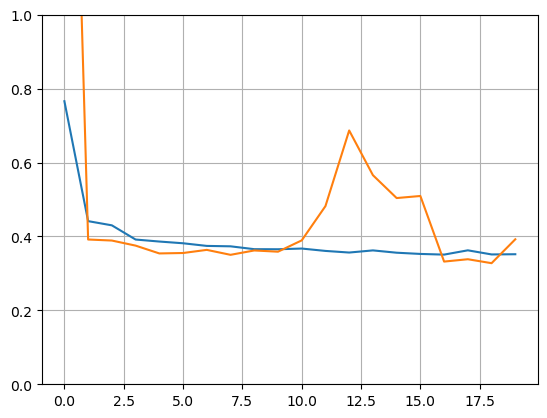

In [56]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluating the model

In [57]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3468


### Using the model to make predictions

In [58]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 161ms/step


In [59]:
y_pred

array([[0.5122266],
       [1.7303637],
       [4.2737713]], dtype=float32)